In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.sparse import csr_matrix
from mpl_toolkits.axes_grid1 import make_axes_locatable
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error
import itertools
from sklearn.metrics import silhouette_samples, silhouette_score
from timeit import default_timer
start = default_timer()

# plt.style.use('ggplot')

# csv파일로부터 데이터 적재

In [0]:
st = default_timer()

# First time data load.
movies = pd.read_csv('data/ml-latest-small/movies.csv')
ratings = pd.read_csv('data/ml-latest-small/ratings.csv')

# Organise a bit and store into feater-format
movies.sort_values(by='movieId', inplace=True)
movies.reset_index(inplace=True, drop=True)
ratings.sort_values(by='movieId', inplace=True)
ratings.reset_index(inplace=True, drop=True)

print(ratings.dtypes)

userId         int64
movieId        int64
rating       float64
timestamp      int64
dtype: object


# 영화제목으로부터 '년도' 분리

In [0]:
# Split titile and release year in separate columns in movies dataframe. Convert year to timestamp
movies['year'] = movies.title.str.extract("\((\d{4})\)", expand=True)
movies.year = pd.to_datetime(movies.year, format='%Y')
movies.year = movies.year.dt.year # As there are some NaN years, resulting type will be float(decimals)
movies.title = movies.title.str[:-7]

In [0]:
movies

,movieId,title,genres,year
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995.0
1,2,Jumanji,Adventure|Children|Fantasy,1995.0
2,3,Grumpier Old Men,Comedy|Romance,1995.0
3,4,Waiting to Exhale,Comedy|Drama|Romance,1995.0
4,5,Father of the Bride Part II,Comedy,1995.0
...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic,Action|Animation|Comedy|Fantasy,2017.0
9738,193583,No Game No Life: Zero,Animation|Comedy|Fantasy,2017.0
9739,193585,Flint,Drama,2017.0
9740,193587,Bungo Stray Dogs: Dead Apple,Action|Animation,2018.0


# 영화 장르별로 체크하도록 DataFrame재정의

In [0]:
# Categorize movies movies genres properly. Working later with +20M rows of strings proved very resource consuming
genres_unique = pd.DataFrame(movies.genres.str.split('|').tolist()).stack().unique()
genres_unique = pd.DataFrame(genres_unique, columns=['genre'])
movies = movies.join(movies.genres.str.get_dummies().astype(int))
movies.drop('genres', inplace=True, axis=1)

In [0]:
movies

,movieId,title,year,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,1995.0,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji,1995.0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men,1995.0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale,1995.0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II,1995.0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic,2017.0,0,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9738,193583,No Game No Life: Zero,2017.0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9739,193585,Flint,2017.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9740,193587,Bungo Stray Dogs: Dead Apple,2018.0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# 군집화

### 영화의 장르별로 유사한 영화끼리 clustering!

In [0]:
# string값을 가지는 열을 삭제
del movies['title']
del movies['year']

## 1. 데이터 전처리

In [0]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
movies = scaler.fit_transform(movies)

In [0]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
movies = pca.fit_transform(movies)

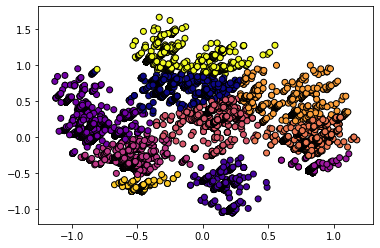

In [0]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10)

kmeans.fit(movies)

cluster = kmeans.predict(movies)

plt.scatter(movies[:, 0], movies[:, 1], c=cluster, linewidth=1, edgecolor="black", cmap='plasma')
plt.show()

In [0]:
cluster

array([6, 7, 3, ..., 4, 0, 6], dtype=int32)